In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **import Tensorflow**

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

# Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.


In [14]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [15]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [40]:
train_images.shape

(50000, 32, 32, 3)

In [16]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [42]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Normalize pixel values to be between 0 and 1

In [17]:
train_images,test_images=train_images/255.0,test_images/255.0

In [18]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Verify the data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:

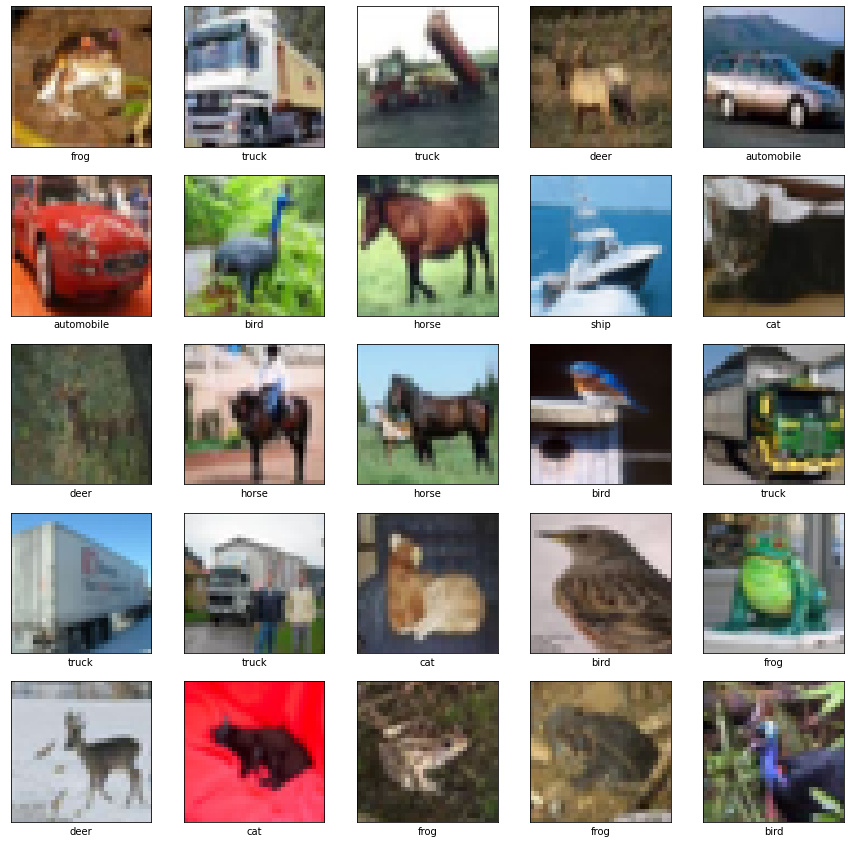

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [50]:
test_labels[0],test_labels[120],test_labels[20],test_labels[200],test_labels[100]

(array([3], dtype=uint8),
 array([8], dtype=uint8),
 array([7], dtype=uint8),
 array([5], dtype=uint8),
 array([4], dtype=uint8))

# Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of your model so far:

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, we can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

# **Add Dense layers on top**
To complete the model, we will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so we use a final Dense layer with 10 outputs.

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

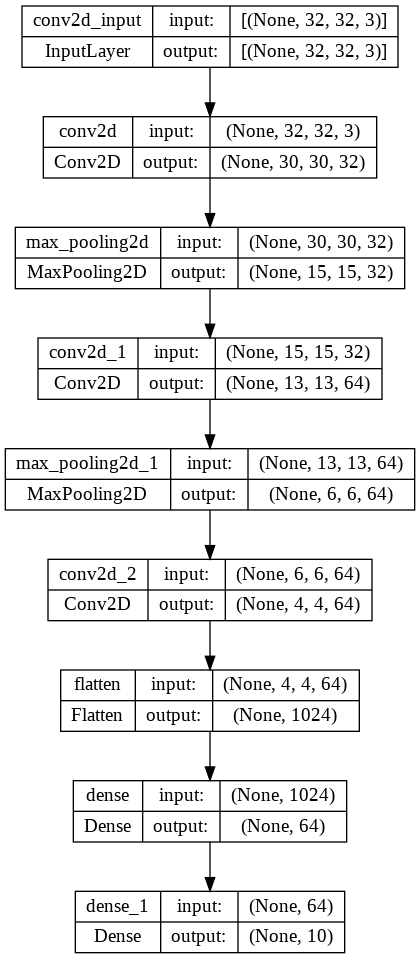

In [48]:
from keras import utils
from keras.utils import np_utils
utils.plot_model(model,show_shapes=True)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

# **Compile and train the model**

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5430 - accuracy: 0.4363 - val_loss: 1.3229 - val_accuracy: 0.5223
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1473 - accuracy: 0.5959 - val_loss: 1.0608 - val_accuracy: 0.6215
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9920 - accuracy: 0.6502 - val_loss: 0.9891 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8936 - accuracy: 0.6863 - val_loss: 0.9168 - val_accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8271 - accuracy: 0.7121 - val_loss: 0.9045 - val_accuracy: 0.6898
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7742 - accuracy: 0.7301 - val_loss: 0.8610 - val_accuracy: 0.7075
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7462 - val_loss: 0.8437 - val_accuracy

In [51]:
#saving the model
model.save('CIFAR.h5')

# **Evaluate the model**

313/313 - 1s - loss: 0.8947 - accuracy: 0.7060 - 724ms/epoch - 2ms/step


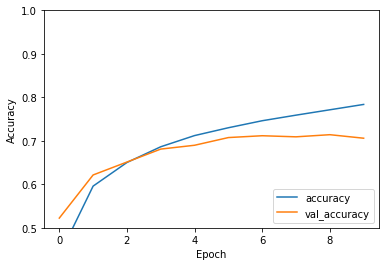

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #this will give testing accuracy direct

In [28]:
print(test_acc)

0.7059999704360962


our simple CNN has achieved a test accuracy of over 70%

In [29]:
print(test_loss)

0.8946924805641174


----

In [37]:
y_pred=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [38]:
y_pred=np.argmax(y_pred,axis=1).astype('int')

In [31]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_pred,test_labels)

0.706

In [73]:
#loading the model
import keras
model=keras.models.load_model('CIFAR.h5')

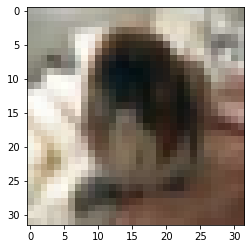

In [80]:
plt.imshow(test_images[200],cmap='flare')#this gives us the picture 

In [77]:
x=np.reshape(test_images[200],[1,32,32,3]) #1 represents the batch size and 32,32,3 is the input size of the images
np.argmax(model.predict(x)) #this is giving us the class

1/1 [==============================] - 0s 19ms/step


5

In [81]:
model.predict(x)# probability of all the classes for that test image at 200th location. 
#so we can see that class 5 has the highest probability hence we are getting 5 in the above code.

1/1 [==============================] - 0s 16ms/step


array([[-3.1713707 , -5.2927604 ,  1.5365398 ,  1.8276342 , -1.7350309 ,
         2.780799  ,  0.11630512,  1.4870505 , -2.9522974 ,  0.11727785]],
      dtype=float32)